In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def load_data(filepath):
    return np.load(filepath, allow_pickle=True)

## Static Long Short with FF_block

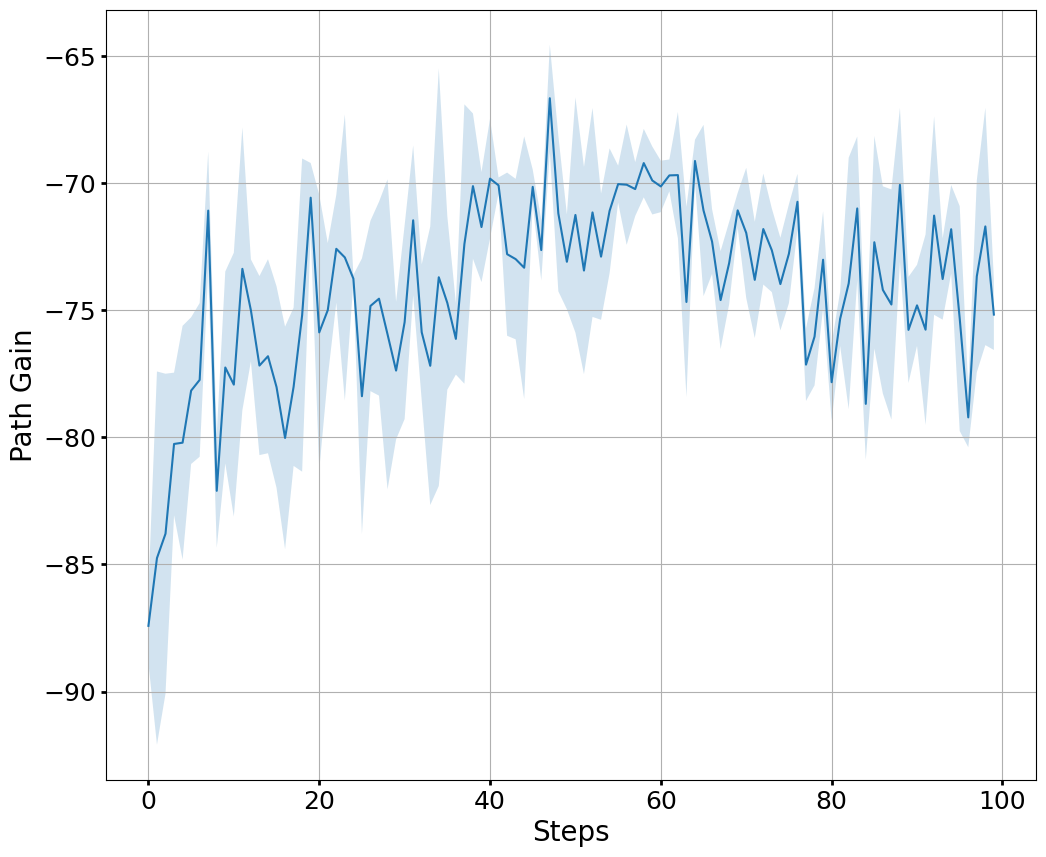

In [ ]:
long_short_ff_128_filepath = "/home/hieule/research/saris/tmp_SAC_Hallway_Static__ls_128_NN_small_step__wireless-sigmap-v0__16adae3c_local_assets/logs/SAC_Hallway_Static__ls_128_NN_small_step__wireless-sigmap-v0__16adae3c/all_path_gains.npy"

long_short_ff_128 = load_data(long_short_ff_128_filepath)

ls_128_ff_linear_path_gains = 10 ** (long_short_ff_128 / 10)
ls_128_ff_sum_path_gains = np.sum(ls_128_ff_linear_path_gains, axis=-1)
ls_128_db_ff_sum_path_gains = 10 * np.log10(ls_128_ff_sum_path_gains)
ls_128_ff_mean_path_gains = np.mean(ls_128_db_ff_sum_path_gains, axis=1)
ls_128_ff_std_path_gains = np.std(ls_128_db_ff_sum_path_gains, axis=1)

fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(ls_128_ff_mean_path_gains, label="SL 256")
ax.fill_between(
    range(100),
    ls_128_ff_mean_path_gains - ls_128_ff_std_path_gains,
    ls_128_ff_mean_path_gains + ls_128_ff_std_path_gains,
    alpha=0.2,
)

ax.set_xlabel("Steps")
ax.set_ylabel("Path Gain")
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.grid()
plt.show()

## Moving Long Short with FF_block

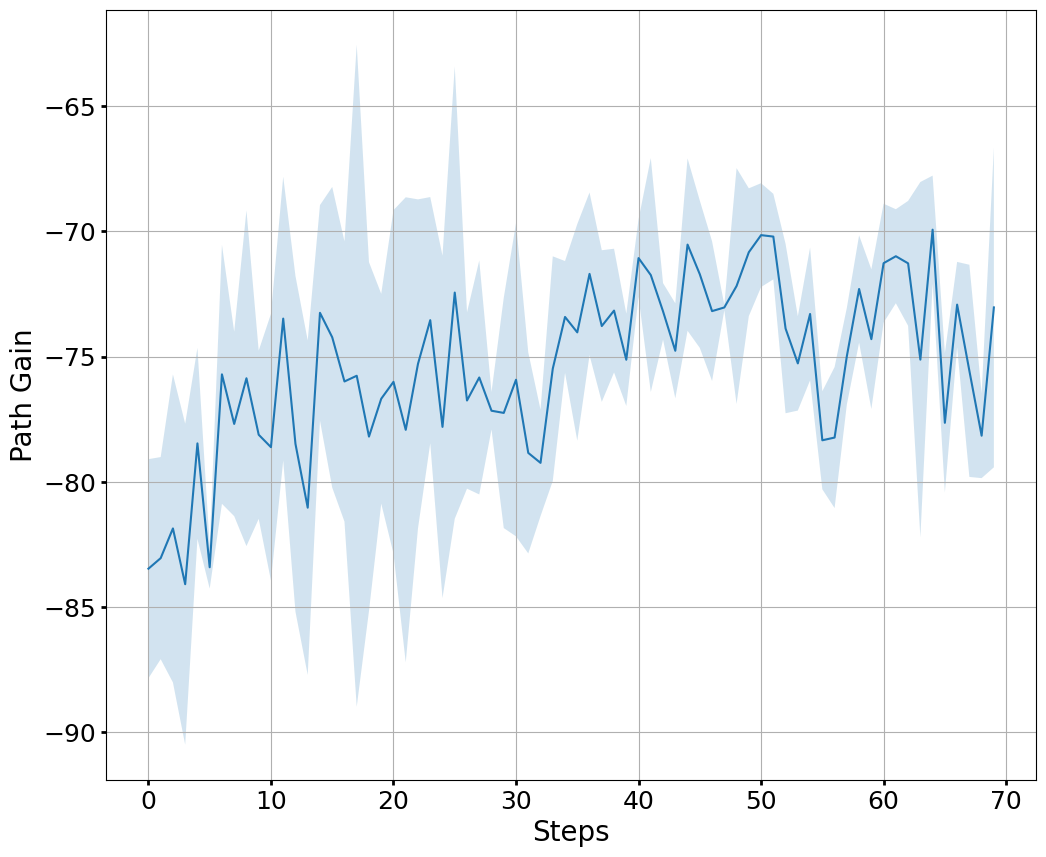

In [9]:
long_short_mov_ff_128_filepath = "/home/hieule/research/saris/tmp_SAC_Hallway_moving__ls_128_NN_small_step__wireless-moving-v0_local_assets/logs/SAC_Hallway_moving__ls_128_NN_small_step__wireless-moving-v0__d27e89e0/all_path_gains.npy"

long_short_mov_ff_128 = load_data(long_short_mov_ff_128_filepath)

ls_128_ff_mov_linear_path_gains = 10 ** (long_short_mov_ff_128 / 10)
ls_128_ff_mov_sum_path_gains = np.sum(ls_128_ff_mov_linear_path_gains, axis=-1)
ls_128_db_ff_mov_sum_path_gains = 10 * np.log10(ls_128_ff_mov_sum_path_gains)
ls_128_ff_mov_mean_path_gains = np.mean(ls_128_db_ff_mov_sum_path_gains, axis=1)
ls_128_ff_mov_std_path_gains = np.std(ls_128_db_ff_mov_sum_path_gains, axis=1)

fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(ls_128_ff_mov_mean_path_gains, label="SL 256")
ax.fill_between(
    range(70),
    ls_128_ff_mov_mean_path_gains - ls_128_ff_mov_std_path_gains,
    ls_128_ff_mov_mean_path_gains + ls_128_ff_mov_std_path_gains,
    alpha=0.2,
)
ax.set_xlabel("Steps")
ax.set_ylabel("Path Gain")
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.grid()
plt.show()

## Short Long vs Long Short (no FF_block for action in critic)

In [3]:
long_short_128_filepath = "/home/hieule/research/saris/tmp_SAC_Shaped_Reward_sl__small_128_NN__wireless-sigmap-v0_local_assets/logs/SAC_Shaped_Reward_ls__small_NN__wireless-sigmap-v0__7ccee032/all_path_gains.npy"

long_short_256_filepath = "/home/hieule/research/saris/tmp_SAC_Shaped_Reward_sl__orin_256_NN_wireless-sigmap-v0_local_assets/logs/SAC_Shaped_Reward_sl__orin_NN__wireless-sigmap-v0__55a91ea9/all_path_gains.npy"

short_long_256_filepath = "/home/hieule/research/saris/tmp_long_short_mean_adjusted_256_wireless-sigmap-v0_local_assets/SAC_Mean_Adjusted__orin__wireless-sigmap-v0__fecc18e6/all_path_gains.npy"

In [5]:
long_short_128 = load_data(long_short_128_filepath)
long_short_256 = load_data(long_short_256_filepath)
short_long_256 = load_data(short_long_256_filepath)

In [6]:
long_short_128.shape

(100, 3, 3)

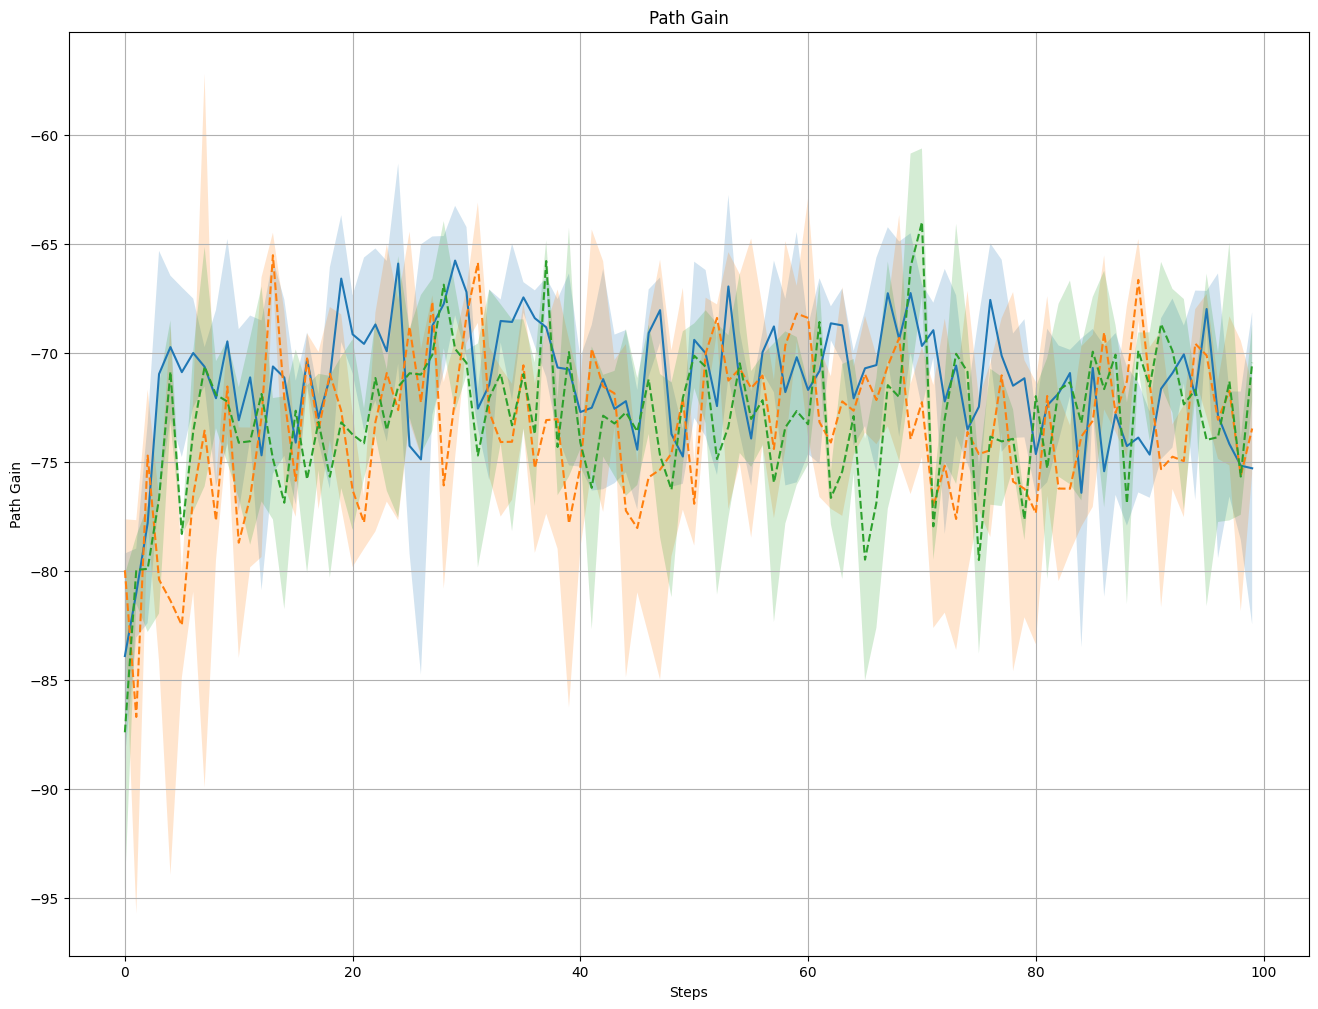

In [16]:
sl_256_linear_path_gains = 10 ** (short_long_256 / 10)
sl_256_sum_path_gains = np.sum(sl_256_linear_path_gains, axis=-1)
sl_256_db_sum_path_gains = 10 * np.log10(sl_256_sum_path_gains)
sl_256_mean_path_gains = np.mean(sl_256_db_sum_path_gains, axis=1)
sl_256_std_path_gains = np.std(sl_256_db_sum_path_gains, axis=1)

ls_256_linear_path_gains = 10 ** (long_short_256 / 10)
ls_256_sum_path_gains = np.sum(ls_256_linear_path_gains, axis=-1)
ls_256_db_sum_path_gains = 10 * np.log10(ls_256_sum_path_gains)
ls_256_mean_path_gains = np.mean(ls_256_db_sum_path_gains, axis=1)
ls_256_std_path_gains = np.std(ls_256_db_sum_path_gains, axis=1)

ls_128_linear_path_gains = 10 ** (long_short_128 / 10)
ls_128_sum_path_gains = np.sum(ls_128_linear_path_gains, axis=-1)
ls_128_db_sum_path_gains = 10 * np.log10(ls_128_sum_path_gains)
ls_128_mean_path_gains = np.mean(ls_128_db_sum_path_gains, axis=1)
ls_128_std_path_gains = np.std(ls_128_db_sum_path_gains, axis=1)

fig, ax = plt.subplots(figsize=(16, 12))
ax.plot(sl_256_mean_path_gains, label="SL 256")
ax.fill_between(
    range(100),
    sl_256_mean_path_gains - sl_256_std_path_gains,
    sl_256_mean_path_gains + sl_256_std_path_gains,
    alpha=0.2,
)

ax.plot(ls_256_mean_path_gains, label="LS 256", linestyle="--")
ax.fill_between(
    range(100),
    ls_256_mean_path_gains - ls_256_std_path_gains,
    ls_256_mean_path_gains + ls_256_std_path_gains,
    alpha=0.2,
)

ax.plot(ls_128_mean_path_gains, label="LS 128", linestyle="--")
ax.fill_between(
    range(100),
    ls_128_mean_path_gains - ls_128_std_path_gains,
    ls_128_mean_path_gains + ls_128_std_path_gains,
    alpha=0.2,
)


ax.set_xlabel("Steps")
ax.set_ylabel("Path Gain")
ax.set_title("Path Gain")
ax.grid()
plt.show()

In [7]:
long_short_128_average = np.mean(long_short_128, axis=-1)
long_short_256_average = np.mean(long_short_256, axis=-1)
short_long_256_average = np.mean(short_long_256, axis=-1)

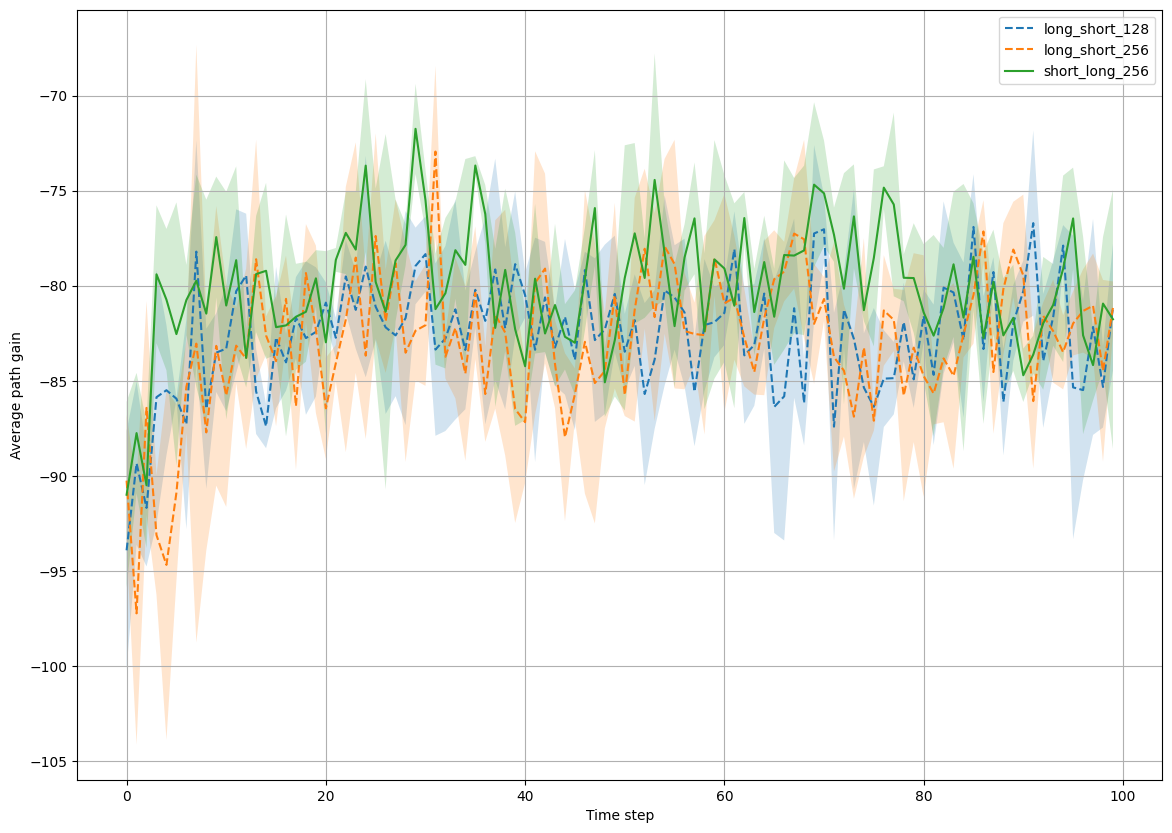

In [12]:
# plot with average and standard deviation for all runs
plt.figure(figsize=(14, 10))
plt.plot(long_short_128_average.mean(axis=1), label="long_short_128", linestyle="--")
plt.fill_between(np.arange(long_short_128_average.shape[0]), long_short_128_average.mean(axis=1) - long_short_128_average.std(axis=1), long_short_128_average.mean(axis=1) + long_short_128_average.std(axis=1), alpha=0.2)

plt.plot(long_short_256_average.mean(axis=1), label="long_short_256", linestyle="--")
plt.fill_between(np.arange(long_short_256_average.shape[0]), long_short_256_average.mean(axis=1) - long_short_256_average.std(axis=1), long_short_256_average.mean(axis=1) + long_short_256_average.std(axis=1), alpha=0.2)

plt.plot(short_long_256_average.mean(axis=1), label="short_long_256")
plt.fill_between(np.arange(short_long_256_average.shape[0]), short_long_256_average.mean(axis=1) - short_long_256_average.std(axis=1), short_long_256_average.mean(axis=1) + short_long_256_average.std(axis=1), alpha=0.2)

plt.legend()
# grid
plt.grid(True)
plt.xlabel("Time step")
plt.ylabel("Average path gain")
plt.show()
